In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MEDV'] = california.target

In [ ]:
data

In [ ]:
data.isnull().sum()

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)


In [ ]:
len(y_test)

In [ ]:
len(predictions)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

### Parameters

In [ ]:
# model = LinearRegression(
#     fit_intercept=True,   # Include intercept in the model
#     copy_X=True,          # Make a copy of the input features
#     n_jobs=-1             # Use all available CPU cores for computation
# )

## ASSUMPTIONS OF LINEAR REGRESSION

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')

data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [2]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [3]:
data.dropna(inplace=True)

### 1. Linearity

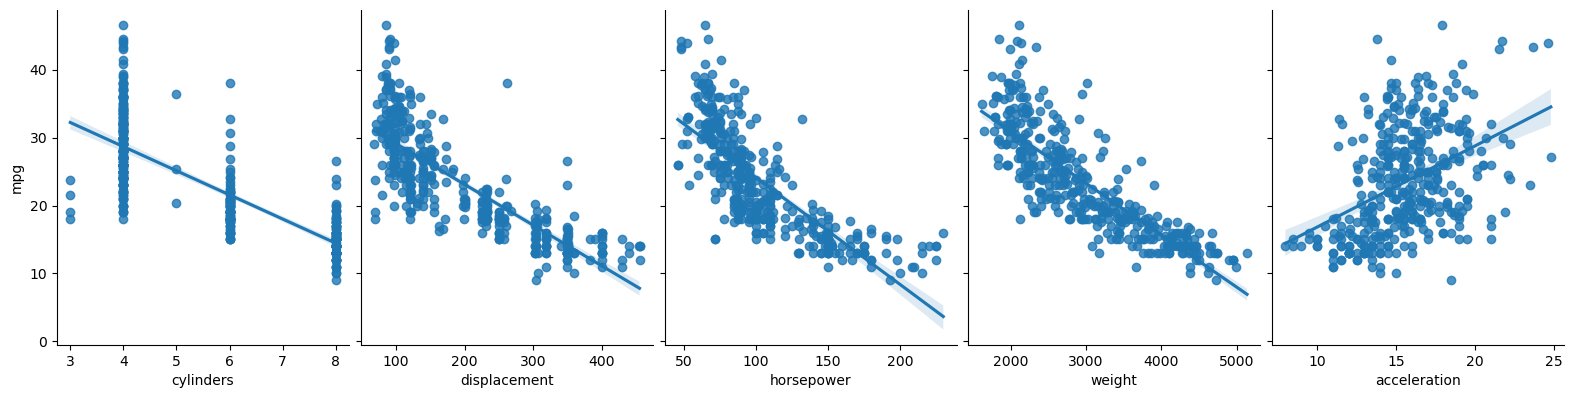

In [4]:
sns.pairplot(data, x_vars=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'], y_vars='mpg', height=4, aspect=0.8, kind='reg')
plt.show()

### 2. Independence of Errors

In [5]:
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm

# Define the predictors and target variable
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = data['mpg']

# Add a constant to the predictors
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
residuals = model.resid

# Durbin-Watson test
dw_stat = durbin_watson(residuals)
dw_stat


0.8651526966464065

- Value close to 0 : Strong Positive AutoCorrelation , Don't follow independence of errors
- Value close to 2 : No AutoCorrelation , Follow Independence of Errors
- Value close to 4: Strong Negative AutoCorrelation , Don't follow independence of errors

### 3.Homoscedasticity

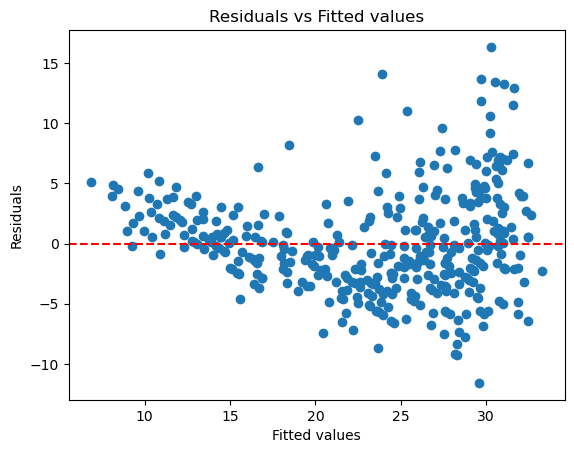

In [7]:
# Residuals plot
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

- Homodasecity : If points are scattered randomly and dont follow a pattern

### 4. Normality of Errors

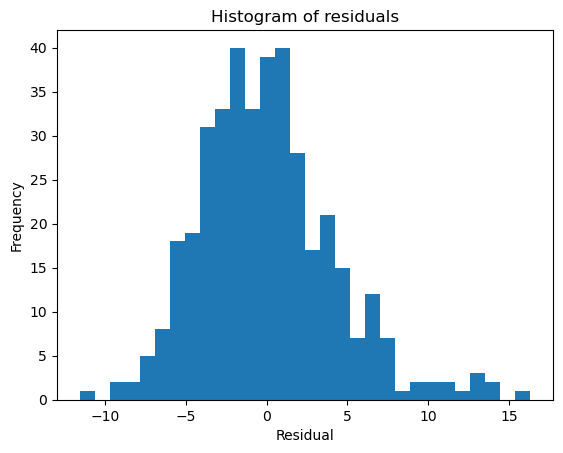

In [8]:
plt.hist(model.resid, bins=30)
plt.title('Histogram of residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

### 5.  No Multicollinearity

In [10]:
X.columns

Index(['const', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration'],
      dtype='object')

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,const,154.860110
1,cylinders,10.630870
2,displacement,19.535061
3,horsepower,8.916017
4,weight,10.430271
5,acceleration,2.609487


- Value above 10 : High Multicollinearity